https://www.kaggle.com/krishanudb/pytorch-tutorial-for-beginners  

In [68]:
import random
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root="./data", train = False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 4, shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [57]:
def plot_figs(num_figs = 10):
    fig, axes = plt.subplots(1, num_figs, figsize=(1 * num_figs, 1))
    num_train = len(trainset.targets)
    random_nums = random.sample(range(num_train), num_figs)
    for i in range(num_figs):
        axes[i].imshow(trainset.data[random_nums[i]])
        axes[i].set_title(classes[trainset.targets[random_nums[i]]])
        axes[i].set_xticks([])
        axes[i].set_yticks([])
    plt.show()

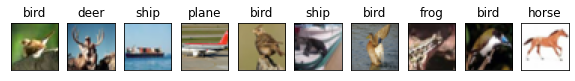

In [58]:
plot_figs(10)

In [59]:
trainset.data[0].shape

(32, 32, 3)

In [61]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 5)
        self.conv2 = nn.Conv2d(8, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [62]:
net = ConvNet()

In [65]:
# Define a loss function and an optimizer
criteria = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [66]:
# Train the network

for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        
        loss = criteria(outputs, labels)
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print("[{}, {}], Loss: {}".format(epoch + 1, i + 1, running_loss / 2000.))
            running_loss = 0.0

print("Finished Training")

[1, 2000], Loss: 2.176774934530258
[1, 4000], Loss: 1.8117264012396335
[1, 6000], Loss: 1.6497289553284644
[1, 8000], Loss: 1.5545591134428978
[1, 10000], Loss: 1.4922281495779752
[1, 12000], Loss: 1.4362531625926496
[2, 2000], Loss: 1.3676399205997587
[2, 4000], Loss: 1.3480640133619308
[2, 6000], Loss: 1.338689102359116
[2, 8000], Loss: 1.3090953242704273
[2, 10000], Loss: 1.2948111793920398
[2, 12000], Loss: 1.2662284982614218
Finished Training


In [67]:
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

Actual cat	Predicted: cat
Actual ship	Predicted: ship
Actual ship	Predicted: ship
Actual plane	Predicted: ship


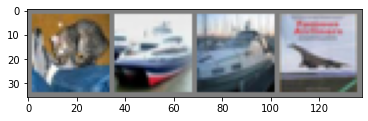

In [69]:
dataiter = iter(testloader)
images, labels = dataiter.next()
outputs = net(images)
_, predicted = torch.max(outputs, 1)

imshow(torchvision.utils.make_grid(images))
for i in range(4):
    print("Actual {}\tPredicted: {}".format(classes[labels[i]], classes[predicted[i]]))